In [1]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics 
%matplotlib inline

#Data Preprocessing

In [3]:
#Read in data
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Making sure that none are null
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Separate the dataset into features and labels
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

#EDA

Text(0, 0.5, 'Count')

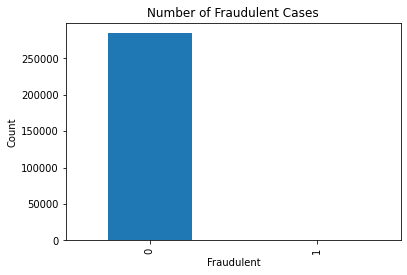

In [6]:
num_classes = pd.value_counts(data['Class'], sort = False)

#Create bar graph to see distribution of fradualent classes
num_classes.plot(kind="bar")
plt.title("Number of Fraudulent Cases")
plt.xlabel("Fraudulent")
plt.ylabel("Count")

In [7]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


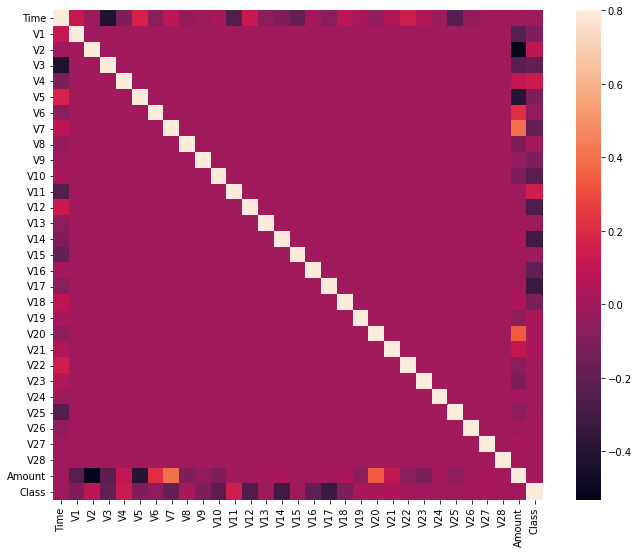

In [8]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

There are three different methods that can be used to deal with an imbalanced dataset.


1.   Oversampling
2.   Undersampling
3.   Combined Class Methods



One main method to deal with an imablanced dataset is **oversampling**. This means that we create new synthetic observation of the small label in order to create more of it. 

A common technique to due this called **SMOTE - Synthetic Minority Over-Sampling Technique**. 

In [9]:
from imblearn.over_sampling import RandomOverSampler
overSample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = overSample.fit_resample(X, y)

Another way to deal with an imbalanced dataset is **undersampling**.

In [10]:
from imblearn.under_sampling import RandomUnderSampler
underSample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = underSample.fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)

#Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



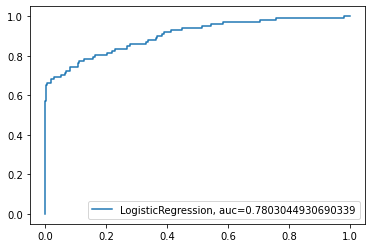

In [15]:
y_pred_probability = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
LR_over = LogisticRegression()
LR_over.fit(X_train_over, y_train_over)
y_pred_over = LR.predict(X_test_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     56750
           1       1.00      0.65      0.79     56976

    accuracy                           0.82    113726
   macro avg       0.87      0.82      0.82    113726
weighted avg       0.87      0.82      0.82    113726



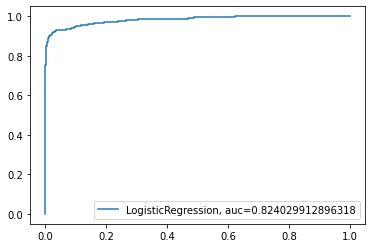

In [18]:
y_pred_over_probability = LR_over.predict_proba(X_test_over)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_over, y_pred_over_probability)
auc = metrics.roc_auc_score(y_test_over, y_pred_over)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
LR_under = LogisticRegression()
LR_under.fit(X_train_under, y_train_under)
y_pred_under = LR.predict(X_test_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        99
           1       1.00      0.67      0.80        98

    accuracy                           0.84       197
   macro avg       0.88      0.84      0.83       197
weighted avg       0.88      0.84      0.83       197



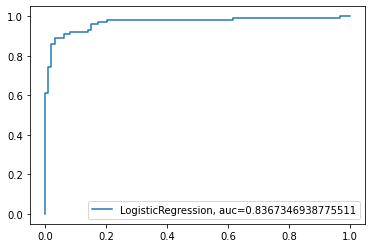

In [21]:
y_pred_under_probability = LR_under.predict_proba(X_test_under)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_under, y_pred_under_probability)
auc = metrics.roc_auc_score(y_test_under, y_pred_under)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
param_grid = {"C": [1,2,3,4,5,6,7,8,9,10], 
              "penalty": ['l1','l2']} #Parameters 
              
grid_search_lr = GridSearchCV(LR, param_grid, scoring="precision") #score
grid_search_lr.fit(y_test, y_pred)

lr = grid_search_lr.best_estimator_ 
grid_search_lr.best_params_, grid_search_lr.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

({'C': 3, 'penalty': 'l2'}, 0.5616661218263049)

Using our best found parameters on the different models now.

In [23]:
LR = LogisticRegression(C=1, penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
LR_over = LogisticRegression(C=1, penalty='l2')
LR_over.fit(X_train_over, y_train_over)
y_pred_over = LR.predict(X_test_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     56750
           1       1.00      0.65      0.79     56976

    accuracy                           0.82    113726
   macro avg       0.87      0.82      0.82    113726
weighted avg       0.87      0.82      0.82    113726



In [27]:
LR_under = LogisticRegression(C=1, penalty='l2')
LR_under.fit(X_train_under, y_train_under)
y_pred_under = LR.predict(X_test_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        99
           1       1.00      0.67      0.80        98

    accuracy                           0.84       197
   macro avg       0.88      0.84      0.83       197
weighted avg       0.88      0.84      0.83       197



#Random Forests

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



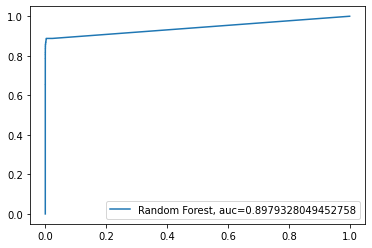

In [32]:
y_pred_probability = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc_over = RandomForestClassifier()
rfc_over.fit(X_train_over, y_train_over)
# predictions
y_pred_over = rfc.predict(X_test_over)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [35]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     56750
           1       1.00      0.96      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



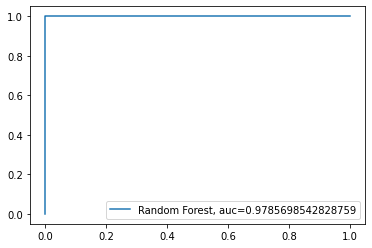

In [37]:
y_pred_probability = rfc_over.predict_proba(X_test_over)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_over, y_pred_probability)
auc = metrics.roc_auc_score(y_test_over, y_pred_over)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc_under = RandomForestClassifier()
rfc_under.fit(X_train_under, y_train_under)
# predictions
y_pred_under = rfc.predict(X_test_under)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [39]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.97      0.98        98

    accuracy                           0.98       197
   macro avg       0.99      0.98      0.98       197
weighted avg       0.99      0.98      0.98       197



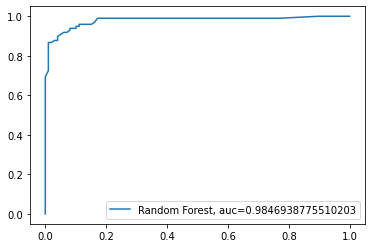

In [40]:
y_pred_probability = rfc_under.predict_proba(X_test_under)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_under, y_pred_probability)
auc = metrics.roc_auc_score(y_test_under, y_pred_under)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

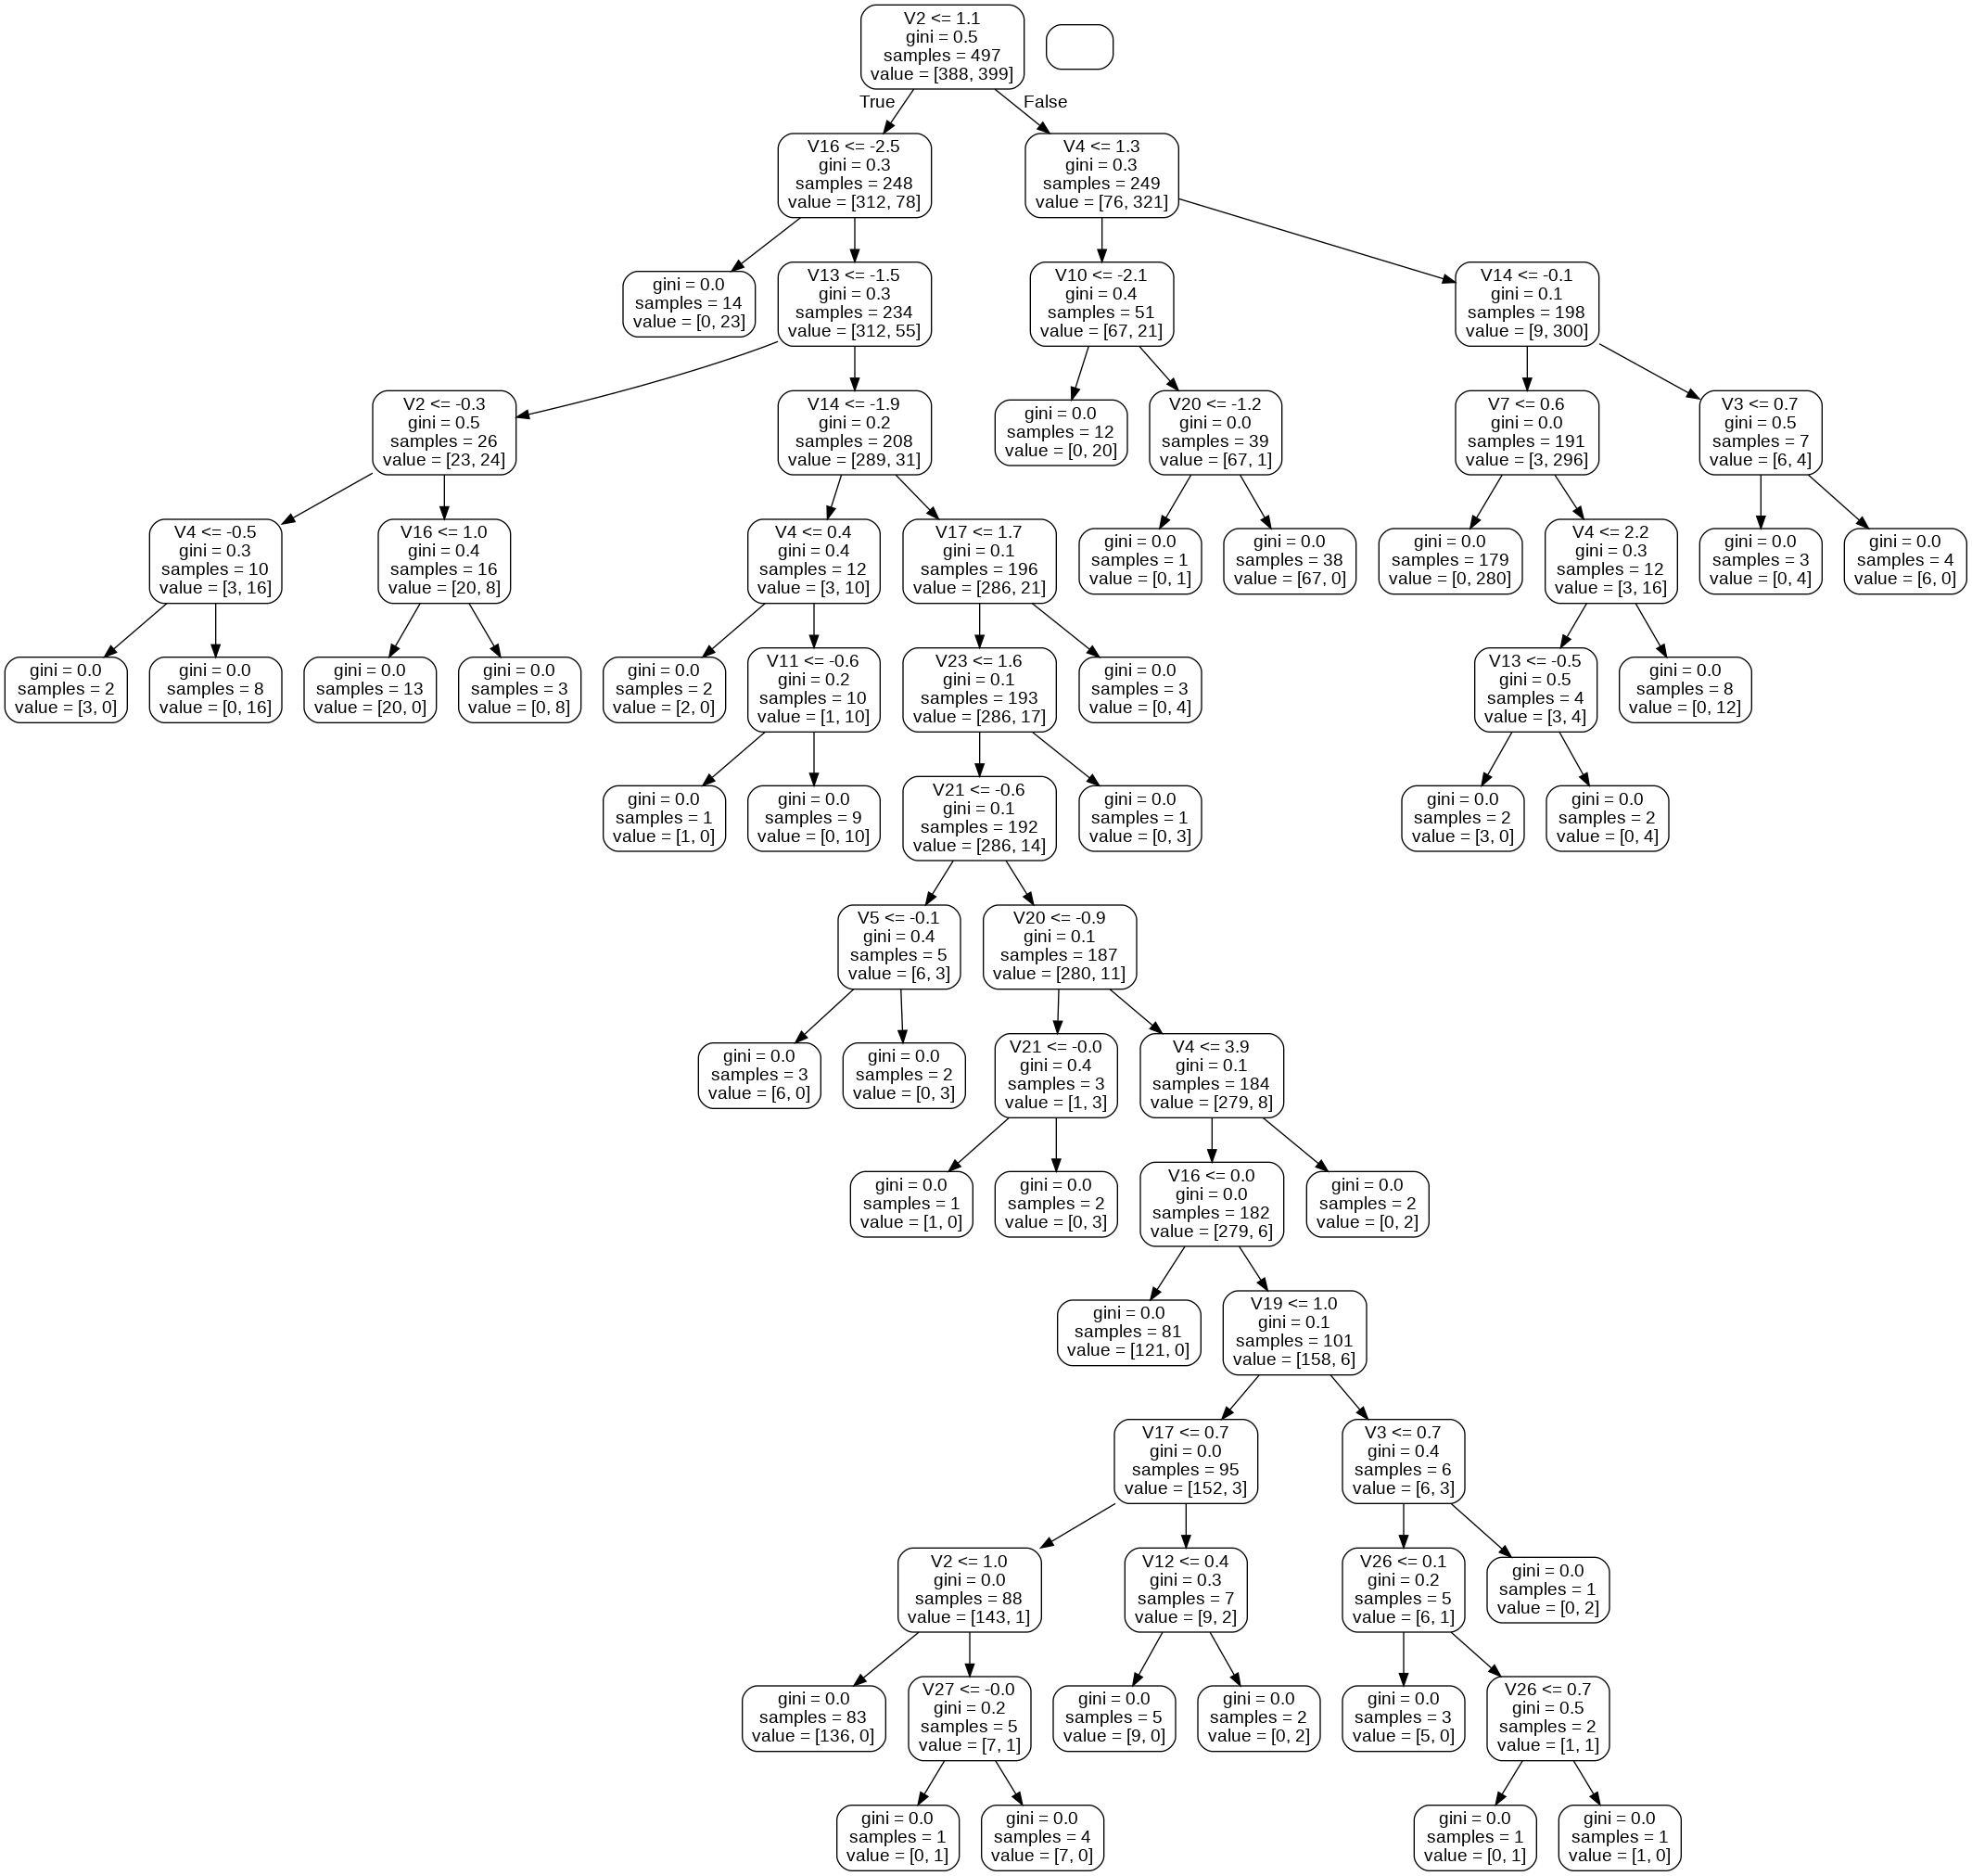

In [42]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = rfc_under.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

#Conclusion

During this project, I was trying to find the best method in order to find fradulent credit card cases. I analyzied two different models logistic regression and Randome Forest. 

One of the first main tast that needed to be dealt with was the imblanace dataset. Given that most of the transactions of the dataset were non-fradulent, the models would most likely always have good accuracy finding the non-fradulent cases but would miss the fradulent ones more due to the imbalance. To deal with this, I used two different methods oversampling and undersampling.

The two models that we used were logistic regression and randome forest. The meteric that we focus most on is the recall given that we want to make sure that we are getting as much fradulent as possible without creating a nuisance to those who didn't have fradulent cases. Through experimentation we found that randome forest with undersampling was able to get us a recall of 97% and an AUC of 98%. The percision for non-fradulent was 97% so only 3% of those who are non-fradulent were found to be fradulent. This is a good trade off compared to the other models that were found.